## Model Test

In [1]:
import torch
import torchvision.transforms as transforms               # include image preprocess tools
from torchvision.datasets import CIFAR10        # for loading images from Pytorch CIFAR
from torch.utils.data import DataLoader
import detectors
import timm
from src.cifar10h import aps_cifar10h_hist, raps_cifar10h_hist, saps_cifar10h_hist, aps_cifar10h_scatter, raps_cifar10h_scatter, saps_cifar10h_scatter
from src.temperature_scaling import ModelWithTemperature

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# load fine-tuned model
model = timm.create_model("vgg16_bn_cifar10", pretrained=True)
model = model.to(device)

# reprocess the images from CIFAR
data_transform = transforms.Compose([
    transforms.ToTensor(),          # transfer to tensor
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])  # normalize
])
# load images from CIFAR10
dataset = CIFAR10(root="../data", train=False, download=True, transform=data_transform)

temp_scal_loader = DataLoader(dataset, batch_size=32, shuffle=True)
model = ModelWithTemperature(model, temperature=5.0).to(device)
model.set_temperature(temp_scal_loader)

model.eval()

C:\Users\jiayang\anaconda3\envs\pytorch2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Files already downloaded and verified
Before temperature - NLL: 0.407, ECE: 0.061
Optimal temperature: 4.903
After temperature - NLL: 0.915, ECE: 0.471


ModelWithTemperature(
  (model): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace=True)
      (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace=True)
      (13): MaxPool2d(kernel_size=2, stride=2, pa

APS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4525 ± 0.0026
Final Average Prediction Set Size: 1.13 ± 0.01
Final Average Coverage: 0.8980 ± 0.0053
Final Average Real Probability: 0.8699 ± 0.0052


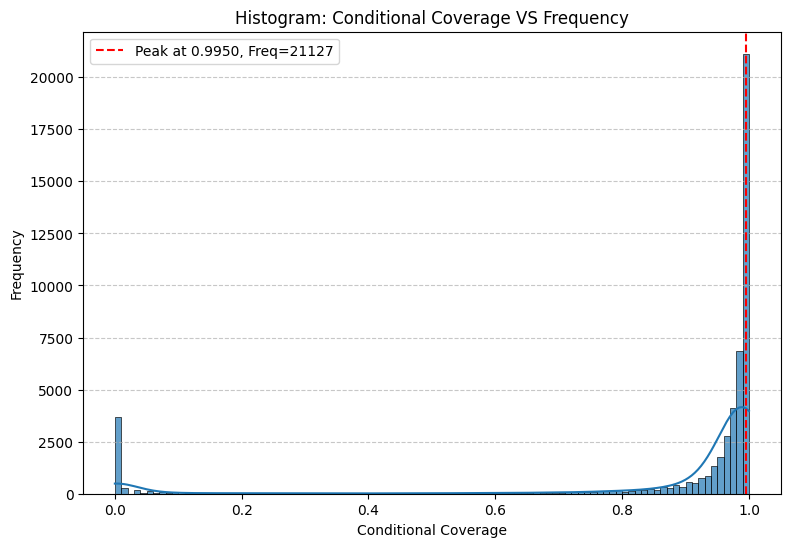

21127 (42.25%) samples reached the peak conditional coverage at 0.9950


In [20]:
aps_cifar10h_hist(model, dataset, device, num_runs=10, alpha=0.1, is_ground_truth=False)

APS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4493 ± 0.0026
Final Average Prediction Set Size: 1.13 ± 0.01
Final Average Coverage: 0.8990 ± 0.0050
Final Average Real Probability: 0.8704 ± 0.0050


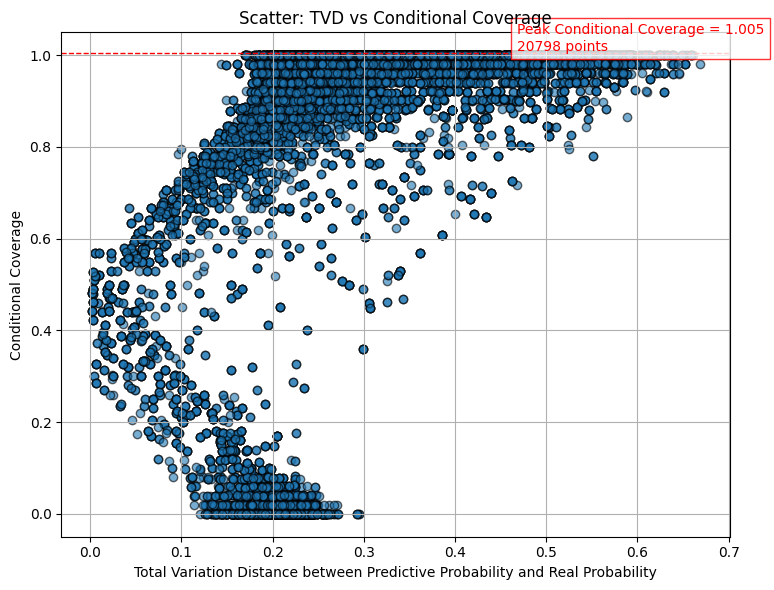

Peak Conditional Coverage = 1.005, with 20798 samples

=== Count Regions Summary ===
41541 (83.1%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
990 (2.0%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
4006 (8.0%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
No points are found in this region.

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.26945', '0.20513']
  Real Probability Set      : ['0.00000', '0.03846']
Sample 2:
  Predictive Probability Set: ['0.41554', '0.09167']
  Real Probability Set      : ['0.00000', '0.01923']
Sample 3:
  Predictive Probability Set: ['0.34186', '0.10193']
  Real Probability Set      : ['0.00000', '0.16981']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.28288', '0.22704']
  Real Probability Set      : ['0.01923', '0.67308']
Sample 2:
  Predictive Probability Set: ['0.20652', '0.20031']


In [2]:
aps_cifar10h_scatter(model, dataset, device, num_runs=10, alpha=0.1)

RAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4654 ± 0.0026
Final Average Prediction Set Size: 1.02 ± 0.01
Final Average Coverage: 0.8983 ± 0.0055
Final Average Real Probability: 0.8689 ± 0.0053


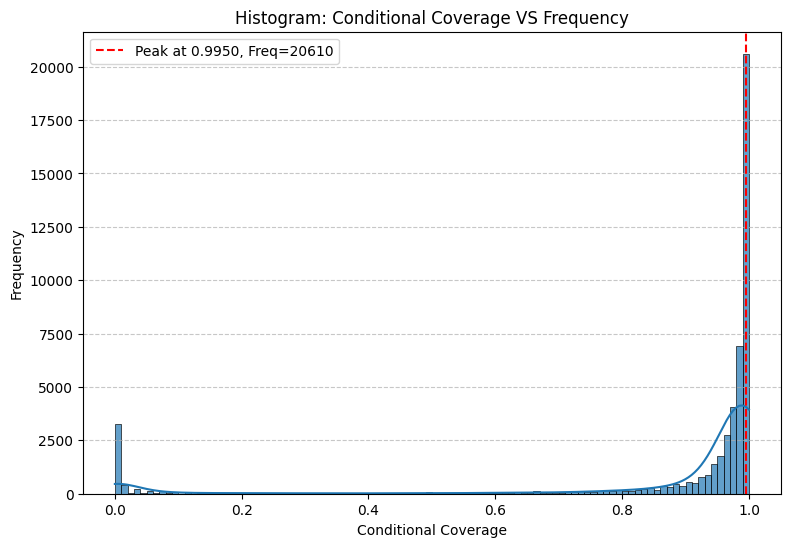

20610 (41.22%) samples reached the peak conditional coverage at 0.9950


In [7]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.1, k_reg=2, num_runs=10, alpha=0.1, is_ground_truth=False)

RAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4654 ± 0.0026
Final Average Prediction Set Size: 1.02 ± 0.01
Final Average Coverage: 0.8983 ± 0.0055
Final Average Real Probability: 0.8689 ± 0.0053


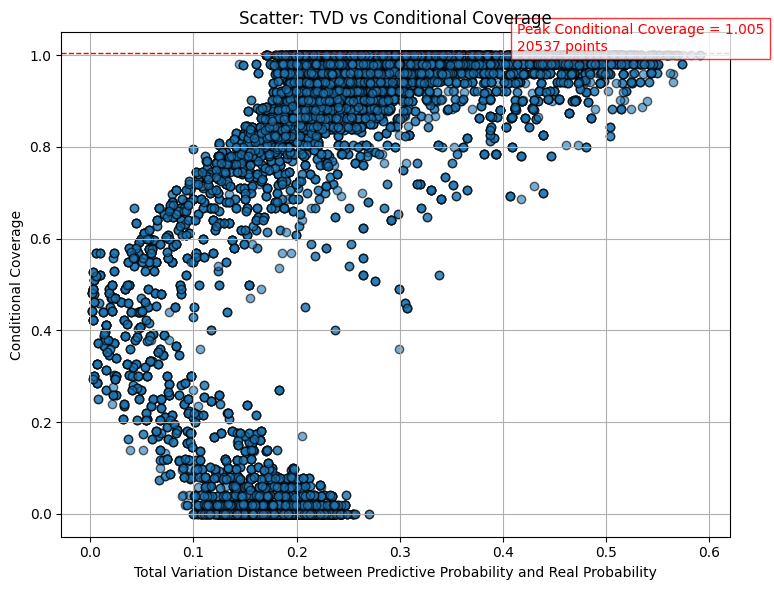

Peak Conditional Coverage = 1.005, with 20537 samples

=== Count Regions Summary ===
42559 (85.1%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
291 (0.6%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
5069 (10.1%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
No points are found in this region.

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.26876', '0.20378']
  Real Probability Set      : ['0.03922', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.24317', '0.21076']
  Real Probability Set      : ['0.00000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.46997']
  Real Probability Set      : ['0.00000']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.20371', '0.18874']
  Real Probability Set      : ['0.03922', '0.72549']
Sample 2:
  Predictive Probability Set: ['0.22724', '0.18231']
  Real Probability Se

In [8]:
raps_cifar10h_scatter(model,dataset,device, lambda_=0.1, k_reg=2, num_runs=10, alpha=0.1)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4860 ± 0.0048
Final Average Prediction Set Size: 0.98 ± 0.00
Final Average Coverage: 0.9007 ± 0.0043
Final Average Real Probability: 0.8715 ± 0.0042


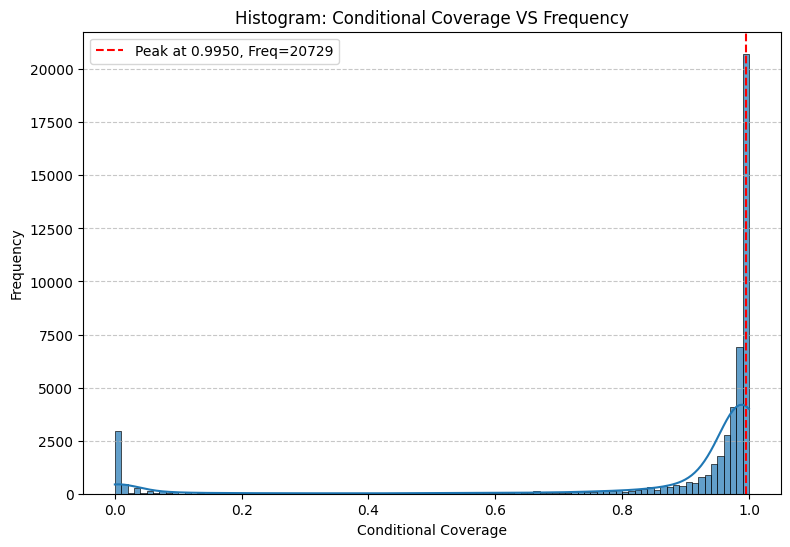

20729 (41.46%) samples reached the peak conditional coverage at 0.9950


In [25]:
saps_cifar10h_hist(model, dataset, device, lambda_=5.0, num_runs=10, alpha=0.1, is_ground_truth=False)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4808 ± 0.0023
Final Average Prediction Set Size: 0.98 ± 0.00
Final Average Coverage: 0.9011 ± 0.0041
Final Average Real Probability: 0.8721 ± 0.0042


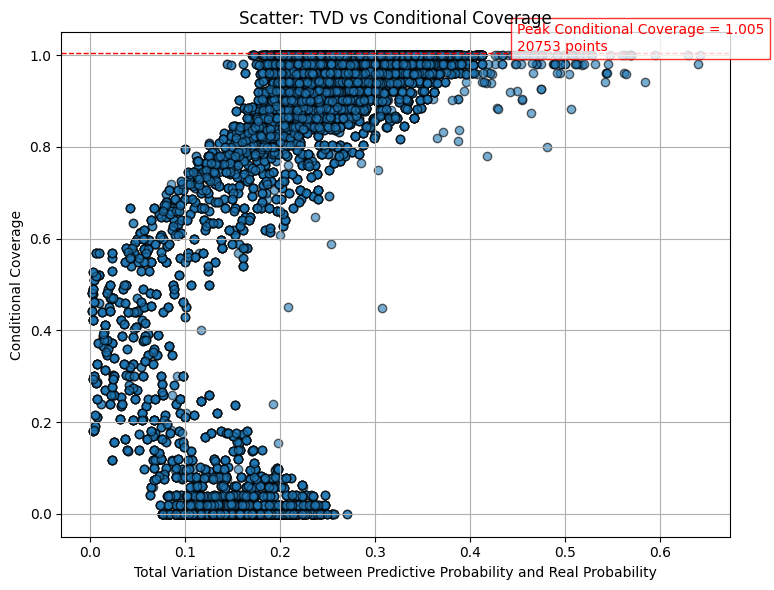

Peak Conditional Coverage = 1.005, with 20753 samples

=== Count Regions Summary ===
43022 (86.0%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
36 (0.1%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
5692 (11.4%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
No points are found in this region.

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.40524']
  Real Probability Set      : ['0.00000']
Sample 2:
  Predictive Probability Set: ['0.51227']
  Real Probability Set      : ['0.00000']
Sample 3:
  Predictive Probability Set: ['0.45915']
  Real Probability Set      : ['0.05769']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.18886', '0.15997']
  Real Probability Set      : ['0.69231', '0.05769']
Sample 2:
  Predictive Probability Set: ['0.29374', '0.19844']
  Real Probability Set      : ['0.02000', '0.76000']
Sample 3:
  P

In [9]:
saps_cifar10h_scatter(model, dataset, device, lambda_=5.0, num_runs=10, alpha=0.1)